# Wegmans Greek Yogurt!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from PIL import Image

In [2]:
# Lets display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Greek Yogurt Survey-RawData_Students_2020.csv')
df.rename(columns={'Question 1: Have you purchased Greek Yogurt in the past month?':'Purchased in Last Month',
                'Question 2: What percentage of your total yogurt purchases are for Greek Yogurt?': 'Greek Percentage of All Yogurt',
                'Question 3: How often do you eat Greek Yogurt each week?': 'Consumption Frequency',
                'Question 4: What percentage of your Greek Yogurt purchases are made at Wegmans?': 'Wegmans Purhcasing Share',
                'Question 12: Do you use Greek Yogurt for cooking?': 'Use For Cooking',
                'Question 17: When deciding what Greek Yogurt to purchase, what is the #1 reason why you select a certain brand of Greek Yogurt?': '17',
                'Question 18: What would be the 2nd reason why you select a certain brand of Greek Yogurt?': '18',
                'Question 19: What would be your 3rd reason for selecting a certain brand of Greek Yogurt?': '19',
                'Question 37: Which of the following best describes your education level?': 'Education',
                'Question 38: What is your total household income?': 'Income'}, inplace = True)
df

Session ID  Email      Submit Time Purchased in Last Month  \
0      403642773    NaN   6/28/2010 5:43                      No   
1      403647532    NaN   6/28/2010 6:07                     Yes   
2      403690017    NaN   6/28/2010 8:41                     Yes   
3      403690095    NaN   6/28/2010 8:41                     Yes   
4      403690128    NaN   6/28/2010 8:40                     Yes   
5      403690244    NaN   6/28/2010 8:40                     Yes   
6      403690313    NaN   6/28/2010 8:37                     Yes   
7      403690358    NaN   6/28/2010 8:42                     Yes   
8      403690398    NaN   6/28/2010 8:48                     Yes   
9      403690408    NaN   6/28/2010 8:43                     Yes   
10     403690456    NaN   6/28/2010 8:46                     Yes   
11     403690460    NaN   6/28/2010 8:43                     Yes   
12     403690527    NaN   6/28/2010 8:39                     Yes   
13     403690558    NaN   6/28/2010 8:45                     Yes   
14     403690573    NaN   6/28/2010 8:40                     Yes   
15     403690596    NaN   6/28/2010 8:41                     Yes   
16     403690615    NaN   6/28/2010 8:41                     Yes   
17     403690661    NaN   6/28/2010 8:40                     Yes   
18     403690722    NaN   6/28/2010 8:40                     Yes   
19     403690733    NaN   6/28/2010 8:40                     Yes   
20     403690742    NaN   6/28/2010 8:47                     Yes   
21     403690746    NaN   6/28/2010 8:51                     Yes   
22     403690786    NaN   6/28/2010 8:44                     Yes   
23     403690806    NaN   6/28/2010 8:36                      No   
24     403690820    NaN   6/28/2010 8:41                     Yes   
25     403690833    NaN   6/28/2010 8:42                     Yes   
26     403690842    NaN  6/29/2010 11:12                     Yes   
27     403690875    NaN   6/28/2010 8:39                     Yes   
28     403690891    NaN   6/28/2010 8:42                     Yes   
29     403690893    NaN   6/28/2010 8:42                     Yes   
...          ...    ...              ...                     ...   
1043   404793339    NaN   7/2/2010 12:25                     Yes   
1044   404796974    NaN   7/2/2010 12:53                     Yes   
1045   404809198    NaN   7/2/2010 13:55                     Yes   
1046   404833935    NaN   7/2/2010 15:56                     Yes   
1047   404836267    NaN   7/2/2010 16:11                      No   
1048   404837695    NaN   7/2/2010 16:32                     Yes   
1049   404848496    NaN   7/2/2010 18:18                     Yes   
1050   404849633    NaN   7/2/2010 18:31                     Yes   
1051   404860426    NaN   7/2/2010 20:42                     Yes   
1052   404864674    NaN   7/2/2010 21:47                     Yes   
1053   404880204    NaN    7/3/2010 3:39                     Yes   
1054   404886119    NaN    7/3/2010 5:32                     Yes   
1055   404904232    NaN    7/3/2010 9:20                     Yes   
1056   404912476    NaN   7/3/2010 10:52                     Yes   
1057   404916741    NaN   7/3/2010 12:00                     Yes   
1058   404920194    NaN   7/3/2010 12:39                     Yes   
1059   404928062    NaN   7/3/2010 14:50                     Yes   
1060   404958928    NaN    7/4/2010 3:29                      No   
1061   404971847    NaN    7/4/2010 7:46                     Yes   
1062   404980073    NaN    7/4/2010 9:59                     Yes   
1063   404980165    NaN    7/4/2010 9:54                      No   
1064   404985028    NaN   7/4/2010 11:20                      No   
1065   405024811    NaN   7/4/2010 23:15                      No   
1066   405053983    NaN    7/5/2010 6:00                     Yes   
1067   405058091    NaN    7/5/2010 6:32                     Yes   
1068   405077575    NaN    7/5/2010 9:07                     Yes   
1069   405081405    NaN    7/5/2010 9:47                     Y

## 1. Depict the portion of the sample that is female vs. male. Use an appropriate test to examine whether this portion differs from the population Wegmans wishes to generalize these results to (in the desired population, females make up 87%). Does this sample differ from the population? If it does, provide a table of the weights to use to match on this characteristic, but do not reweight the data. (1 slide)

In [4]:
#Create the crosstab
sex = pd.crosstab(index = df['Question 33: Are you...'], columns = "Observed Count")
sex.columns.name = None
sex_total = sex.iloc[0,0] + sex.iloc[1,0]
sex['Observed Percent'] = sex['Observed Count']/sex_total
sex['Pop Percent'] = [.87, .13, 0]
sex['Expected Count'] = sex['Pop Percent'] * sex_total
sex.reindex(columns = ['Observed Count', 'Observed Percent', 'Expected Count', 'Pop Percent'])

Observed Count  Observed Percent  Expected Count  \
Question 33: Are you...                                                     
Female                              887          0.894153          863.04   
Male                                105          0.105847          128.96   
Prefer not to say                     9          0.009073            0.00   

                         Pop Percent  
Question 33: Are you...               
Female                          0.87  
Male                            0.13  
Prefer not to say               0.00

In [5]:
# Run the t-test
# First let us drop the "Perfer not to say" row
sex = sex.iloc[:2,:]
sex_chitest = pd.DataFrame(stats.chisquare(sex['Observed Count'], sex['Expected Count']), 
                           index = ['Chi-square value', 'p-value'],
                           columns = ['Sex Observations vs Population'])
sex_chitest

Sex Observations vs Population
Chi-square value                        5.116811
p-value                                 0.023695

The sample does differ from the population at the 5% level, so we reject the null hypothesis that the sample is representative of the desired population!

# 2. Describe the average importance ratings (Q6). Provide any managerially relevant conclusions. (1 slide)

In [6]:
# Isolate columns related to Quesetion 6
question_6 = [col for col in df.columns if col.startswith('Question 6:')]
question_6.remove('Question 6: Please rate the importance of the following attributes when purchasing Greek Yogurt.')
# df_q6 = df[question_6]
# Drop the first column
# df_q6 = df_q6.iloc[:,1:]
# df_q6


In [7]:
df_6 = df[question_6]
df_6.columns = [col.lstrip('Question 6: ') for col in df_6.columns]
df_6 = df_6.dropna()
df_6 = df_6[['Taste', 'Texture', 'Consistency', 'All natural', 'Fat level', 'rbST free', 
             'Protein level', 'Calorie level', 'Price', 'Organic', 'Blended','Side by side cup', 'Fruit on the bottom']]

In [8]:
df_6a = df_6[['Taste', 'Texture', 'Consistency', 'All natural', 'Fat level', 'rbST free']]
df_6b = df_6[['Protein level', 'Calorie level', 'Price', 'Organic', 'Blended','Side by side cup', 'Fruit on the bottom']]

## Setting the SNS Font size

In [9]:
sns.set(font_scale=5)

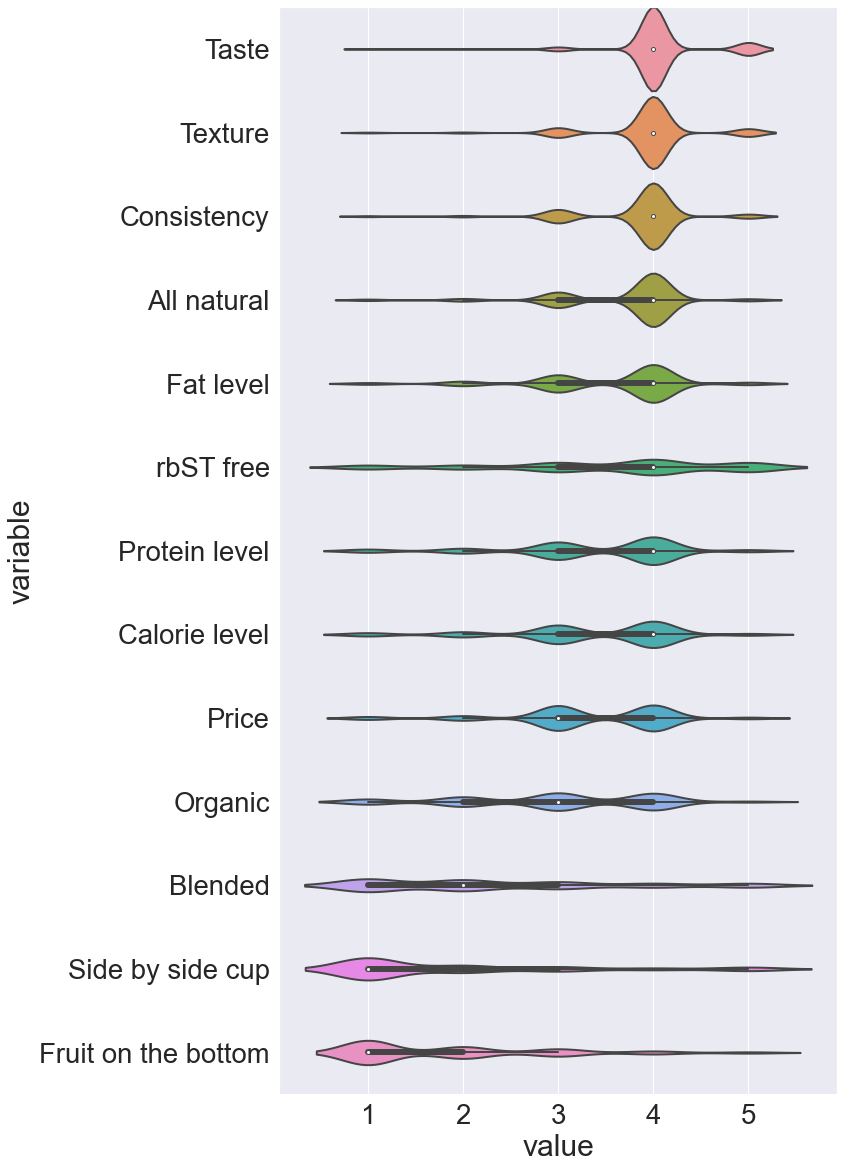

In [10]:
sns.set(rc={'figure.figsize':(10,20)}, font_scale=2.5)
sns.violinplot(y = 'variable', x = 'value', data = pd.melt(df_6), width = 1, linewidth=2)

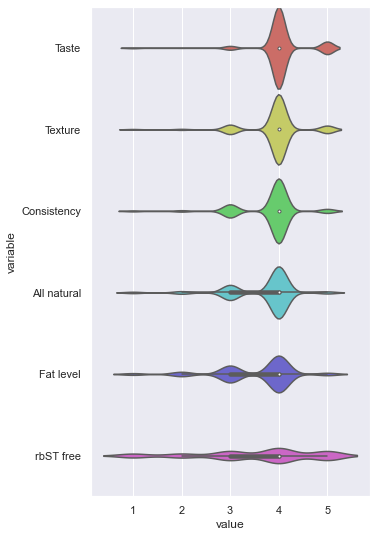

In [11]:
# create a box and whisker
sns.set(rc={'figure.figsize':(5,9)})
# ax = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_6))
sns.violinplot(y = 'variable', x = 'value', data = pd.melt(df_6a), palette = 'hls', width= 1)
plt.show()

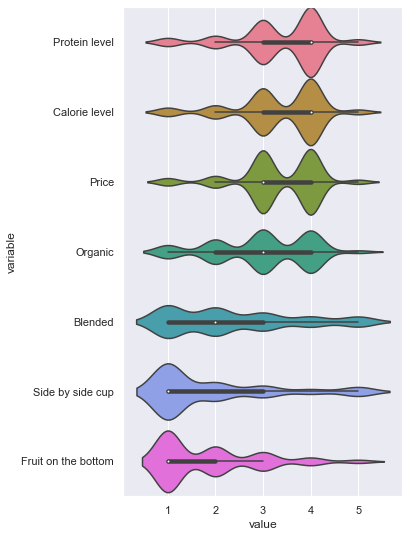

In [12]:

sns.violinplot(y = 'variable', x = 'value', data = pd.melt(df_6b), palette = 'husl', width = 1)

Question 6: All natural  \
Wegmans Purhcasing Share                                             
100% - I only buy Greek Yogurt at Wegmans                 3.705882   
More than 75%, but less than 100%                         3.733010   
50% - 75%                                                 3.694656   
25% - 49%                                                 3.675926   
Less than 25%                                             3.618557   

                                           Question 6: Blended  \
Wegmans Purhcasing Share                                         
100% - I only buy Greek Yogurt at Wegmans             2.477011   
More than 75%, but less than 100%                     2.242718   
50% - 75%                                             2.281250   
25% - 49%                                             2.292453   
Less than 25%                                         2.380952   

                                           Question 6: Calorie level  \
Wegmans Purhcasing Share                                               
100% - I only buy Greek Yogurt at Wegmans                   3.290141   
More than 75%, but less than 100%                           3.312195   
50% - 75%                                                   3.435115   
25% - 49%                                                   3.314815   
Less than 25%                                               3.340206   

                                           Question 6: Consistency  \
Wegmans Purhcasing Share                                             
100% - I only buy Greek Yogurt at Wegmans                 3.841360   
More than 75%, but less than 100%                         3.893204   
50% - 75%                                                 3.863636   
25% - 49%                                                 3.738318   
Less than 25%                                             3.744792   

                                           Question 6: Fat level  \
Wegmans Purhcasing Share                                           
100% - I only buy Greek Yogurt at Wegmans               3.497191   
More than 75%, but less than 100%                       3.551220   
50% - 75%                                               3.628788   
25% - 49%                                               3.555556   
Less than 25%                                           3.544041   

                                           Question 6: Fruit on the bottom  \
Wegmans Purhcasing Share                                                     
100% - I only buy Greek Yogurt at Wegmans                         1.846591   
More than 75%, but less than 100%                                 1.795122   
50% - 75%                                                         1.893130   
25% - 49%                                                         1.704762   
Less than 25%                                                     2.047872   

                                           Question 6: Organic  \
Wegmans Purhcasing Share                                         
100% - I only buy Greek Yogurt at Wegmans             3.019774   
More than 75%, but less than 100%                     3.029268   
50% - 75%                                             2.976923   
25% - 49%                                             2.859813   
Less than 25%                                         2.868421   

                                           Question 6: Price  \
Wegmans Purhcasing Share                                       
100% - I only buy Greek Yogurt at Wegmans           3.163842   
More than 75%, but less than 100%                   3.210784   
50% - 75%                                           3.541985   
25% - 49%                                           3.339623   
Less than 25%                                       3.528497   

                                           Question 6: Protein level  \
Wegmans Purhcasing Share                                               
100% - I only

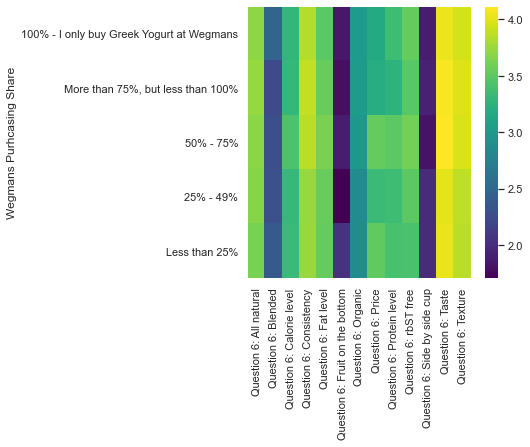

In [13]:
# Add the row that we would like to group by
question_6.append('Wegmans Purhcasing Share')
df_temp = df[question_6].groupby('Wegmans Purhcasing Share').mean()
df_temp = df_temp.reindex(['100% - I only buy Greek Yogurt at Wegmans',
               'More than 75%, but less than 100%',
               '50% - 75%',
               '25% - 49%',
               'Less than 25%'])
display(df_temp)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Wegmans Purhcasing Share')

Contrast is most noticable across columns versus across rows, suggesting that consumers at large share relatively similar values regardless of where they most frequently purchase their yogurt. 

Question 6: All natural  Question 6: Blended  \
Purchased in Last Month                                                 
No                                           NaN                  NaN   
Yes                                     3.689759             2.363357   

                         Question 6: Calorie level  Question 6: Consistency  \
Purchased in Last Month                                                       
No                                             NaN                      NaN   
Yes                                       3.326284                 3.825253   

                         Question 6: Fat level  \
Purchased in Last Month                          
No                                         NaN   
Yes                                   3.541247   

                         Question 6: Fruit on the bottom  Question 6: Organic  \
Purchased in Last Month                                                         
No                                                   NaN                  NaN   
Yes                                             1.865443             2.969574   

                         Question 6: Price  Question 6: Protein level  \
Purchased in Last Month                                                 
No                                     NaN                        NaN   
Yes                               3.313765                   3.366768   

                         Question 6: rbST free  Question 6: Side by side cup  \
Purchased in Last Month                                                        
No                                         NaN                           NaN   
Yes                                    3.51127                      1.921668   

                         Question 6: Taste  Question 6: Texture  
Purchased in Last Month                                          
No                                     NaN                  NaN  
Yes                               4.056056             3.933735

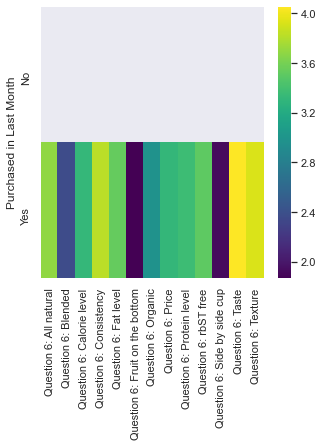

In [14]:
# Add the row that we would like to group by
question_6.append('Purchased in Last Month')
df_temp = df[question_6].groupby('Purchased in Last Month').mean()
# df_temp = df_temp.reindex([])
display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Purchased in Last Month')

In [15]:
df[df['Purchased in Last Month'] == 'No']

Session ID  Email      Submit Time Purchased in Last Month  \
0      403642773    NaN   6/28/2010 5:43                      No   
23     403690806    NaN   6/28/2010 8:36                      No   
32     403690970    NaN   6/28/2010 8:36                      No   
35     403691007    NaN   6/28/2010 8:38                      No   
53     403691452    NaN   6/28/2010 8:38                      No   
64     403691735    NaN   6/28/2010 8:39                      No   
68     403691804    NaN   6/28/2010 8:39                      No   
72     403692085    NaN   6/28/2010 8:40                      No   
80     403692286    NaN   6/28/2010 8:41                      No   
116    403693627    NaN   6/28/2010 8:45                      No   
121    403694004    NaN   6/28/2010 8:46                      No   
158    403695433    NaN   6/28/2010 8:51                      No   
186    403697017    NaN   6/28/2010 8:56                      No   
198    403698004    NaN   6/28/2010 8:59                      No   
202    403698297    NaN   6/28/2010 8:59                      No   
225    403700269    NaN   6/28/2010 9:06                      No   
235    403701131    NaN   6/28/2010 9:09                      No   
257    403702910    NaN   6/28/2010 9:14                      No   
273    403705237    NaN   6/28/2010 9:22                      No   
279    403705905    NaN   6/28/2010 9:24                      No   
283    403706433    NaN   6/28/2010 9:26                      No   
285    403706928    NaN   6/28/2010 9:29                      No   
305    403709291    NaN   6/28/2010 9:35                      No   
322    403711013    NaN   6/28/2010 9:41                      No   
358    403715103    NaN   6/28/2010 9:56                      No   
437    403729309    NaN  6/28/2010 10:46                      No   
457    403734903    NaN  6/28/2010 11:06                      No   
460    403735734    NaN  6/28/2010 11:10                      No   
489    403741529    NaN  6/28/2010 11:31                      No   
500    403744954    NaN  6/28/2010 11:42                      No   
...          ...    ...              ...                     ...   
689    403820847    NaN  6/28/2010 16:17                      No   
702    403825308    NaN  6/28/2010 16:36                      No   
710    403827898    NaN  6/28/2010 16:51                      No   
733    403834814    NaN  6/28/2010 17:36                      No   
744    403838377    NaN  6/28/2010 18:02                      No   
762    403843257    NaN  6/28/2010 18:39                      No   
785    403848964    NaN  6/28/2010 19:25                      No   
804    403855192    NaN  6/28/2010 20:22                      No   
807    403860791    NaN  6/28/2010 21:28                      No   
815    403883248    NaN   6/29/2010 3:08                      No   
816    403884498    NaN   6/29/2010 3:26                      No   
820    403886544    NaN   6/29/2010 3:53                      No   
821    403886658    NaN   6/29/2010 3:54                      No   
830    403890299    NaN   6/29/2010 4:33                      No   
859    403906519    NaN   6/29/2010 5:55                      No   
909    404030488    NaN  6/29/2010 12:13                      No   
927    404101971    NaN  6/29/2010 16:28                      No   
931    404106855    NaN  6/29/2010 16:56                      No   
940    404114268    NaN  6/29/2010 17:45                      No   
953    404125128    NaN  6/29/2010 18:58                      No   
971    404175754    NaN   6/30/2010 4:57                      No   
1004   404373003    NaN  6/30/2010 16:20                      No   
1014   404430105    NaN    7/1/2010 0:46                      No   
1018   404461287    NaN    7/1/2010 5:51                      No   
1023   404490364    NaN    7/1/2010 7:45                      No   
1047   404836267    NaN   7/2/2010 16:11                      No   
1060   404958928    NaN    7/4/2010 3:29                      

Looks like those who didn't purchase in the past month didn't answer question 6!

Question 6: All natural  \
Greek Percentage of All Yogurt                               
100% - I only buy Greek Yogurt                    3.740000   
More than 75%, but less than 100%                 3.677966   
50% - 75%                                         3.672316   
25% - 49%                                         3.684564   
Less than 25%                                     3.621212   

                                   Question 6: Blended  \
Greek Percentage of All Yogurt                           
100% - I only buy Greek Yogurt                2.451724   
More than 75%, but less than 100%             2.244635   
50% - 75%                                     2.273256   
25% - 49%                                     2.283784   
Less than 25%                                 2.606061   

                                   Question 6: Calorie level  \
Greek Percentage of All Yogurt                                 
100% - I only buy Greek Yogurt                      3.313131   
More than 75%, but less than 100%                   3.274262   
50% - 75%                                           3.434286   
25% - 49%                                           3.389262   
Less than 25%                                       3.225564   

                                   Question 6: Consistency  \
Greek Percentage of All Yogurt                               
100% - I only buy Greek Yogurt                    3.848485   
More than 75%, but less than 100%                 3.863830   
50% - 75%                                         3.823864   
25% - 49%                                         3.763514   
Less than 25%                                     3.772727   

                                   Question 6: Fat level  \
Greek Percentage of All Yogurt                             
100% - I only buy Greek Yogurt                  3.564784   
More than 75%, but less than 100%               3.597458   
50% - 75%                                       3.554286   
25% - 49%                                       3.574324   
Less than 25%                                   3.325758   

                                   Question 6: Fruit on the bottom  \
Greek Percentage of All Yogurt                                       
100% - I only buy Greek Yogurt                            1.794521   
More than 75%, but less than 100%                         1.923729   
50% - 75%                                                 1.820809   
25% - 49%                                                 1.850340   
Less than 25%                                             1.992366   

                                   Question 6: Organic  Question 6: Price  \
Greek Percentage of All Yogurt                                              
100% - I only buy Greek Yogurt                3.020478           3.189831   
More than 75%, but less than 100%             2.970339           3.292373   
50% - 75%                                     2.988506           3.408046   
25% - 49%                                     2.925676           3.335570   
Less than 25%                                 2.879699           3.484848   

                                   Question 6: Protein level  \
Greek Percentage of All Yogurt                                 
100% - I only buy Greek Yogurt                      3.482993   
More than 75%, but less than 100%                   3.411017   
50% - 75%                                           3.377143   
25% - 49%                                           3.162162   
Less than 25%                                       3.234848   

                                   Question 6: rbST free  \
Greek Percentage of All Yogurt                             
100% - I only buy Greek Yogurt                  3.634483   
More than 75%, but less than 100%               3.457265   
50% - 75%                                       3.549708   
25% - 49%                                       3.333333   
Less than 25%                                   

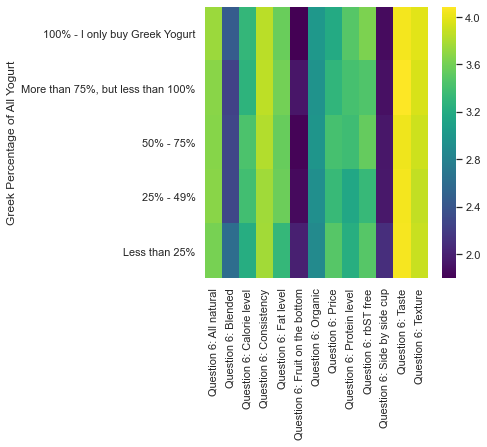

In [16]:
# Add the row that we would like to group by
question_6.append('Greek Percentage of All Yogurt')
df_temp = df[question_6].groupby('Greek Percentage of All Yogurt').mean()
# df_temp = df_temp.reindex([])
df_temp = df_temp.reindex(['100% - I only buy Greek Yogurt',
                'More than 75%, but less than 100%',
                '50% - 75%',
                '25% - 49%',
                'Less than 25%'])
display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Greek Percentage of All Yogurt')

Question 6: All natural  Question 6: Blended  \
Consumption Frequency                                                  
5 or more times a week                 3.672811             2.325472   
3 to 4 times a week                    3.765432             2.288401   
Twice a week                           3.630000             2.319797   
Once a week                            3.666667             2.400000   
Less than once a week                  3.638298             2.602941   

                        Question 6: Calorie level  Question 6: Consistency  \
Consumption Frequency                                                        
5 or more times a week                   3.467593                 3.879070   
3 to 4 times a week                      3.329193                 3.805556   
Twice a week                             3.280000                 3.848485   
Once a week                              3.258929                 3.837838   
Less than once a week                    3.214286                 3.741007   

                        Question 6: Fat level  \
Consumption Frequency                           
5 or more times a week               3.677419   
3 to 4 times a week                  3.540123   
Twice a week                         3.547739   
Once a week                          3.459459   
Less than once a week                3.378571   

                        Question 6: Fruit on the bottom  Question 6: Organic  \
Consumption Frequency                                                          
5 or more times a week                         1.862559             2.924528   
3 to 4 times a week                            1.850932             3.068111   
Twice a week                                   1.862245             2.903553   
Once a week                                    1.845455             3.160714   
Less than once a week                          1.928058             2.769784   

                        Question 6: Price  Question 6: Protein level  \
Consumption Frequency                                                  
5 or more times a week           3.296296                   3.595349   
3 to 4 times a week              3.261682                   3.392523   
Twice a week                     3.313131                   3.318182   
Once a week                      3.372727                   3.252252   
Less than once a week            3.407143                   3.107914   

                        Question 6: rbST free  Question 6: Side by side cup  \
Consumption Frequency                                                         
5 or more times a week               3.528571                      2.038095   
3 to 4 times a week                  3.576803                      1.764706   
Twice a week                         3.418367                      1.964646   
Once a week                          3.394495                      1.981818   
Less than once a week                3.553957                      2.014388   

                        Question 6: Taste  Question 6: Texture  
Consumption Frequency                                           
5 or more times a week           4.041284             3.967890  
3 to 4 times a week              4.030864             3.916923  
Twice a week                     4.100000             3.934343  
Once a week                      4.071429             3.918919  
Less than once a week            4.063380             3.929078

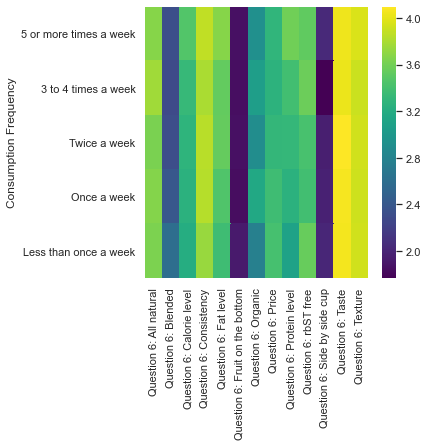

In [17]:
# Add the row that we would like to group by
question_6.append('Consumption Frequency')
df_temp = df[question_6].groupby('Consumption Frequency').mean()
df_temp = df_temp.reindex(['5 or more times a week',
                          '3 to 4 times a week',
                          'Twice a week',
                          'Once a week',
                          'Less than once a week'])
display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Consumption Frequency')

Question 6: All natural  Question 6: Blended  \
Education                                                                
Masters Degree or more                   3.697749             2.321429   
Four-Year College Degree                 3.687500             2.247340   
Some College                             3.643411             2.548387   
Two-Year College Degree                  3.717172             2.505155   
High School Graduate                     3.780000             2.489796   
Prefer not to say                        3.545455             3.000000   

                          Question 6: Calorie level  Question 6: Consistency  \
Education                                                                      
Masters Degree or more                     3.325806                 3.845659   
Four-Year College Degree                   3.296104                 3.797900   
Some College                               3.367188                 3.828125   
Two-Year College Degree                    3.463918                 3.865979   
High School Graduate                       3.180000                 3.840000   
Prefer not to say                          3.318182                 3.772727   

                          Question 6: Fat level  \
Education                                         
Masters Degree or more                 3.605178   
Four-Year College Degree               3.536269   
Some College                           3.440945   
Two-Year College Degree                3.626263   
High School Graduate                   3.340000   
Prefer not to say                      3.409091   

                          Question 6: Fruit on the bottom  \
Education                                                   
Masters Degree or more                           1.734628   
Four-Year College Degree                         1.859788   
Some College                                     1.992063   
Two-Year College Degree                          2.093750   
High School Graduate                             2.120000   
Prefer not to say                                1.523810   

                          Question 6: Organic  Question 6: Price  \
Education                                                          
Masters Degree or more               2.934641           3.248387   
Four-Year College Degree             2.944882           3.311518   
Some College                         3.054264           3.333333   
Two-Year College Degree              2.969072           3.412371   
High School Graduate                 3.020000           3.420000   
Prefer not to say                    3.272727           3.500000   

                          Question 6: Protein level  Question 6: rbST free  \
Education                                                                    
Masters Degree or more                     3.304207               3.441176   
Four-Year College Degree                   3.359580               3.474801   
Some College                               3.354331               3.568000   
Two-Year College Degree                    3.546392               3.628866   
High School Graduate                       3.500000               3.740000   
Prefer not to say                          3.318182               3.800000   

                          Question 6: Side by side cup  Question 6: Taste  \
Education                                                                   
Masters Degree or more                        1.872964           4.057692   
Four-Year College Degree                      1.887139           4.085714   
Some College                                  1.897638           3.969231   
Two-Year College Degree                       2.157895           4.040404   
High School Graduate                          2.240000           4.080000   
Prefer not to say                             1.454545           4.045455   

                          Question 6: Texture  
Education                                      
Masters Deg

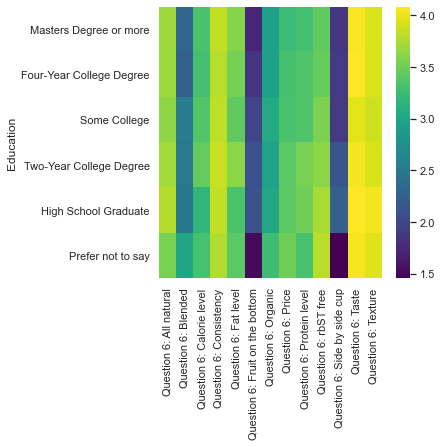

In [18]:
# Add the row that we would like to group by
question_6.append('Education')
df_temp = df[question_6].groupby('Education').mean()
df_temp = df_temp.reindex(['Masters Degree or more',
                          'Four-Year College Degree',
                          'Some College',
                          'Two-Year College Degree',
                          'High School Graduate',
                          'Prefer not to say'])
display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Education')

Question 6: All natural  Question 6: Blended  \
Income                                                             
More than $200,000                 3.617647             2.409091   
$150,000-$200,000                  3.595745             2.078652   
$100,000-$149,999                  3.647436             2.157895   
$75,000-$99,999                    3.650350             2.404255   
$50,000-$74,999                    3.814815             2.196262   
$25,000-$49,999                    3.630952             2.785714   
Prefer not to say                  3.757009             2.477848   

                    Question 6: Calorie level  Question 6: Consistency  \
Income                                                                   
More than $200,000                   3.529412                 3.772727   
$150,000-$200,000                    3.290323                 3.684783   
$100,000-$149,999                    3.337662                 3.844156   
$75,000-$99,999                      3.251748                 3.832168   
$50,000-$74,999                      3.259259                 3.944444   
$25,000-$49,999                      3.176471                 3.833333   
Prefer not to say                    3.393750                 3.834891   

                    Question 6: Fat level  Question 6: Fruit on the bottom  \
Income                                                                       
More than $200,000               3.691176                         1.575758   
$150,000-$200,000                3.612903                         1.711111   
$100,000-$149,999                3.548387                         1.928105   
$75,000-$99,999                  3.464789                         1.788732   
$50,000-$74,999                  3.518519                         1.841121   
$25,000-$49,999                  3.416667                         2.000000   
Prefer not to say                3.583851                         1.959119   

                    Question 6: Organic  Question 6: Price  \
Income                                                       
More than $200,000             2.742424           3.104478   
$150,000-$200,000              2.795699           3.164835   
$100,000-$149,999              2.896104           3.274510   
$75,000-$99,999                2.958042           3.237762   
$50,000-$74,999                2.971698           3.541284   
$25,000-$49,999                3.094118           3.559524   
Prefer not to say              3.082019           3.291536   

                    Question 6: Protein level  Question 6: rbST free  \
Income                                                                 
More than $200,000                   3.276923               3.230769   
$150,000-$200,000                    3.197802               3.326087   
$100,000-$149,999                    3.393548               3.355263   
$75,000-$99,999                      3.364286               3.364286   
$50,000-$74,999                      3.416667               3.660377   
$25,000-$49,999                      3.464286               3.630952   
Prefer not to say                    3.378882               3.711111   

                    Question 6: Side by side cup  Question 6: Taste  \
Income                                                                
More than $200,000                      1.924242           3.985075   
$150,000-$200,000                       1.733333           4.032258   
$100,000-$149,999                       1.796053           4.025806   
$75,000-$99,999                         1.937063           4.062937   
$50,000-$74,999                         1.850467           4.109091   
$25,000-$49,999                         2.047619           4.129412   
Prefer not to say                       2.015674           4.067901   

                    Question 6: Texture  
Income                                   
More than $200,000             3.895522  
$150,000-$200,000              3.872340  
$100,000-$149,999    

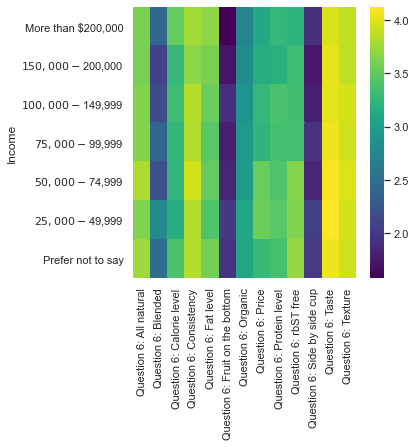

In [19]:
# Add the row that we would like to group by
question_6.append('Income')
df_temp = df[question_6].groupby('Income').mean()
df_temp = df_temp.reindex(['More than $200,000',
                          '$150,000-$200,000',
                          '$100,000-$149,999',
                          '$75,000-$99,999',
                          '$50,000-$74,999',
                          '$25,000-$49,999',
                          'Prefer not to say'])

display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Income')

Question 6: All natural  Question 6: Blended  \
Use For Cooking                                                 
No                              3.638672             2.418327   
Yes                             3.745342             2.303797   

                 Question 6: Calorie level  Question 6: Consistency  \
Use For Cooking                                                       
No                                3.374510                 3.794521   
Yes                               3.273859                 3.859833   

                 Question 6: Fat level  Question 6: Fruit on the bottom  \
Use For Cooking                                                           
No                            3.576172                         2.047431   
Yes                           3.503119                         1.668776   

                 Question 6: Organic  Question 6: Price  \
Use For Cooking                                           
No                          2.913725           3.405138   
Yes                         3.031579           3.218295   

                 Question 6: Protein level  Question 6: rbST free  \
Use For Cooking                                                     
No                                3.421260               3.504970   
Yes                               3.307531               3.514831   

                 Question 6: Side by side cup  Question 6: Taste  \
Use For Cooking                                                    
No                                   2.013834           4.070175   
Yes                                  1.825630           4.041237   

                 Question 6: Texture  
Use For Cooking                       
No                          3.912281  
Yes                         3.958506

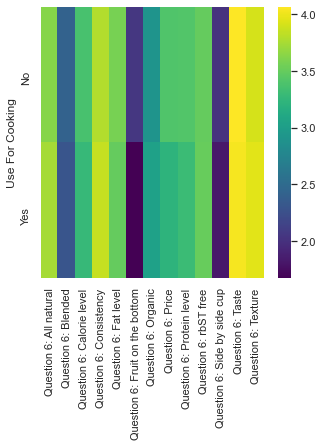

In [20]:
# Add the row that we would like to group by
question_6.append('Use For Cooking')
df_temp = df[question_6].groupby('Use For Cooking').mean()
display(df_temp)
sns.heatmap(df_temp, cmap = 'viridis')
# Delete the added row so that question_6 remains unchanged
question_6.remove('Use For Cooking')

In [21]:
from itertools import combinations
for combo in combinations(df[question_6], 2):
    print('\033[1m' + combo[0].lstrip('Question 6: ') + " and " + combo[1].lstrip('Question 6: ') + " t-test" + '\033[0m')
    print(stats.ttest_rel(df[combo[0]], df[combo[1]], nan_policy='omit'))
    print('\n')

All natural and Blended t-test
Ttest_relResult(statistic=28.857685911911044, pvalue=7.801849823725225e-133)


All natural and Calorie level t-test
Ttest_relResult(statistic=10.437089399426338, pvalue=2.8888791751491335e-24)


All natural and Consistency t-test
Ttest_relResult(statistic=-5.105694528167153, pvalue=3.952967914055315e-07)


All natural and Fat level t-test
Ttest_relResult(statistic=4.604943383409695, pvalue=4.662854041383404e-06)


All natural and Fruit on the bottom t-test
Ttest_relResult(statistic=43.92050965290263, pvalue=1.731458582431766e-233)


All natural and Organic t-test
Ttest_relResult(statistic=23.1274150990957, pvalue=7.824670371642937e-95)


All natural and Price t-test
Ttest_relResult(statistic=11.429720634721763, pvalue=1.696686785101966e-28)


All natural and Protein level t-test
Ttest_relResult(statistic=9.393069621296457, pvalue=3.934151348571226e-20)


All natural and rbST free t-test
Ttest_relResult(statistic=4.803952433511412, pvalue=1.800357854071569

In [22]:
df_ttest = pd.DataFrame(columns = [col.lstrip('Question 6: ') for col in question_6],
                        index = [col.lstrip('Question 6: ') for col in question_6])
for combo in combinations(df[question_6], 2):
    # Match the column and index names and populate the entry with the second ouput from the ttest - i.e., the p-value
    df_ttest.loc[combo[1].lstrip('Question 6: '), combo[0].lstrip('Question 6: ')] = \
    pd.DataFrame(stats.ttest_rel(df[combo[0]], df[combo[1]], nan_policy='omit')).iloc[1,0].astype(float)

df_ttest.replace({np.nan: ""}, inplace = True)
df_ttest

All natural       Blended Calorie level   Consistency  \
All natural                                                                   
Blended              7.80185e-133                                             
Calorie level         2.88888e-24   1.08107e-76                               
Consistency           3.95297e-07  4.62755e-156    9.2189e-50                 
Fat level             4.66285e-06  7.85345e-105   9.18736e-19   6.30558e-23   
Fruit on the bottom  1.73146e-233   1.40983e-24  3.08389e-169  2.28921e-275   
Organic               7.82467e-95   8.94779e-30   5.37806e-16   1.86859e-97   
Price                 1.69669e-28   7.24098e-69      0.666662   4.14241e-53   
Protein level         3.93415e-20   7.48241e-79      0.207901   1.70431e-39   
rbST free             1.80036e-06   1.71256e-84   6.02494e-05   1.43225e-13   
Side by side cup     2.34436e-193    1.8745e-16  5.05421e-127  7.21493e-218   
Taste                  2.3512e-42  1.00494e-193   7.95955e-91   3.13716e-36   
Texture               1.55984e-19  1.73731e-170   8.23249e-64   2.98898e-10   

                        Fat level Fruit on the bottom       Organic  \
All natural                                                           
Blended                                                               
Calorie level                                                         
Consistency                                                           
Fat level                                                             
Fruit on the bottom  1.72982e-208                                     
Organic               2.26032e-40        9.68916e-105                 
Price                 1.43429e-11        5.53336e-181   1.26913e-16   
Protein level         5.55819e-07         3.2115e-177   4.46821e-22   
rbST free                0.607747        1.53046e-156   2.64464e-34   
Side by side cup     2.56355e-162            0.182531   1.01085e-75   
Taste                 9.15693e-65        4.83789e-320  3.76676e-141   
Texture               3.29488e-38        2.80024e-291  1.35498e-114   

                            Price Protein level    rbST free Side by side cup  \
All natural                                                                     
Blended                                                                         
Calorie level                                                                   
Consistency                                                                     
Fat level                                                                       
Fruit on the bottom                                                             
Organic                                                                         
Price                                                                           
Protein level            0.111537                                               
rbST free             9.80207e-06   0.000597004                                 
Side by side cup      2.9334e-135  2.99352e-134  7.4965e-147                    
Taste                6.78574e-110   1.05797e-82  1.17816e-35     1.29336e-251   
Texture               3.50533e-78   6.94371e-56   5.1845e-22     2.57422e-233   

                           Taste Texture  
All natural                               
Blended                                   
Calorie level                             
Consistency                               
Fat level                                 
Fruit on the bottom                       
Organic                                   
Price                                     
Protein level                             
rbST free                                 
Side by side cup                          
Taste                                     
Texture              1.11757e-22

# Let's do a chi-square test for all of the pairs

In [23]:
df_6

Taste  Texture  Consistency  All natural  Fat level  rbST free  \
2       4.0      4.0          3.0          4.0        4.0        5.0   
3       4.0      4.0          4.0          4.0        4.0        5.0   
4       4.0      4.0          4.0          4.0        4.0        5.0   
5       4.0      4.0          4.0          3.0        3.0        5.0   
6       4.0      4.0          4.0          4.0        5.0        4.0   
8       5.0      4.0          4.0          4.0        3.0        4.0   
9       4.0      4.0          4.0          4.0        3.0        5.0   
10      4.0      4.0          4.0          4.0        3.0        3.0   
11      4.0      3.0          3.0          4.0        4.0        4.0   
12      4.0      4.0          4.0          3.0        3.0        4.0   
13      4.0      4.0          4.0          3.0        4.0        2.0   
14      3.0      3.0          3.0          3.0        3.0        3.0   
15      4.0      4.0          4.0          4.0        4.0        3.0   
16      4.0      4.0          4.0          4.0        4.0        5.0   
17      4.0      4.0          3.0          4.0        3.0        3.0   
18      4.0      4.0          4.0          4.0        4.0        3.0   
19      4.0      4.0          4.0          4.0        3.0        4.0   
20      4.0      4.0          3.0          4.0        3.0        3.0   
21      4.0      4.0          4.0          4.0        4.0        4.0   
22      4.0      4.0          4.0          3.0        4.0        2.0   
24      5.0      5.0          4.0          3.0        3.0        1.0   
25      4.0      4.0          4.0          3.0        3.0        2.0   
26      4.0      3.0          3.0          4.0        4.0        5.0   
27      4.0      4.0          4.0          4.0        4.0        2.0   
28      4.0      4.0          4.0          4.0        4.0        1.0   
29      2.0      4.0          4.0          4.0        4.0        4.0   
30      4.0      4.0          4.0          4.0        3.0        4.0   
33      4.0      4.0          4.0          5.0        3.0        5.0   
34      4.0      4.0          4.0          4.0        4.0        2.0   
36      5.0      5.0          4.0          4.0        3.0        3.0   
...     ...      ...          ...          ...        ...        ...   
1035    4.0      4.0          3.0          4.0        3.0        3.0   
1036    5.0      5.0          4.0          4.0        2.0        5.0   
1037    4.0      4.0          4.0          3.0        4.0        5.0   
1038    4.0      4.0          4.0          4.0        4.0        4.0   
1039    4.0      4.0          4.0          4.0        4.0        4.0   
1040    5.0      3.0          3.0          3.0        3.0        5.0   
1041    5.0      5.0          5.0          1.0        4.0        1.0   
1042    4.0      4.0          4.0          3.0        3.0        1.0   
1043    4.0      4.0          4.0          4.0        4.0        1.0   
1044    4.0      1.0          2.0          2.0        4.0        1.0   
1046    4.0      4.0          4.0          3.0        4.0        5.0   
1049    4.0      4.0          4.0          4.0        4.0        2.0   
1050    4.0      4.0          4.0          4.0        4.0        4.0   
1051    4.0      4.0          4.0          4.0        4.0        1.0   
1053    5.0      5.0          4.0          4.0        4.0        3.0   
1054    5.0      5.0          4.0          3.0        3.0        3.0   
1055    4.0      4.0          4.0          3.0        4.0        1.0   
1056    4.0      4.0          4.0          4.0        4.0        4.0   
1057    4.0      3.0          3.0          4.0        4.0        5.0   
1058    4.0      4.0          4.0          4.0        4.0        3.0   
1059    4.0      4.0          4.0          2.0        2.0        3.0   
1061    3.0      4.0          3.0          3.0        4.0        3.0   
1062    4.0      4.0          3.0          3.0        3.0        5.0   
1066    4.0      3.0          4.0          4.0

# Correlation Test

In [84]:
corr_matrix = df[question_6].dropna().corr()

In [85]:
corr_matrix

Question 6: All natural  Question 6: Blended  \
Question 6: All natural                         1.000000             0.057391   
Question 6: Blended                             0.057391             1.000000   
Question 6: Calorie level                       0.060675             0.156557   
Question 6: Consistency                         0.154126             0.047136   
Question 6: Fat level                           0.035113             0.059512   
Question 6: Fruit on the bottom                -0.065988             0.209566   
Question 6: Organic                             0.371848             0.067201   
Question 6: Price                               0.059509             0.035257   
Question 6: Protein level                       0.116550             0.124614   
Question 6: rbST free                           0.302619             0.146074   
Question 6: Side by side cup                   -0.001285             0.192313   
Question 6: Taste                               0.056720             0.006339   
Question 6: Texture                             0.103690             0.000224   

                                 Question 6: Calorie level  \
Question 6: All natural                           0.060675   
Question 6: Blended                               0.156557   
Question 6: Calorie level                         1.000000   
Question 6: Consistency                           0.158797   
Question 6: Fat level                             0.617592   
Question 6: Fruit on the bottom                   0.102699   
Question 6: Organic                               0.008971   
Question 6: Price                                 0.207003   
Question 6: Protein level                         0.303868   
Question 6: rbST free                             0.050454   
Question 6: Side by side cup                      0.024622   
Question 6: Taste                                 0.025781   
Question 6: Texture                               0.026157   

                                 Question 6: Consistency  \
Question 6: All natural                         0.154126   
Question 6: Blended                             0.047136   
Question 6: Calorie level                       0.158797   
Question 6: Consistency                         1.000000   
Question 6: Fat level                           0.198737   
Question 6: Fruit on the bottom                 0.008999   
Question 6: Organic                             0.049492   
Question 6: Price                               0.091830   
Question 6: Protein level                       0.102152   
Question 6: rbST free                           0.076524   
Question 6: Side by side cup                   -0.015810   
Question 6: Taste                               0.468939   
Question 6: Texture                             0.543310   

                                 Question 6: Fat level  \
Question 6: All natural                       0.035113   
Question 6: Blended                           0.059512   
Question 6: Calorie level                     0.617592   
Question 6: Consistency                       0.198737   
Question 6: Fat level                         1.000000   
Question 6: Fruit on the bottom               0.044332   
Question 6: Organic                          -0.006556   
Question 6: Price                             0.181074   
Question 6: Protein level                     0.250485   
Question 6: rbST free                         0.010758   
Question 6: Side by side cup                  0.007925   
Question 6: Taste                             0.118683   
Question 6: Texture                           0.116999   

                                 Question 6: Fruit on the bottom  \
Question 6: All natural                                -0.065988   
Question 6: Blended                                     0.209566   
Question 6: Calorie level                               0.102699   
Question 6: Consistency                                 0.008999   
Question 6: Fat level              

In [25]:
df[question_6].dropna().corr(method = 'kendall')

Question 6: All natural  Question 6: Blended  \
Question 6: All natural                         1.000000             0.029699   
Question 6: Blended                             0.029699             1.000000   
Question 6: Calorie level                       0.057211             0.125721   
Question 6: Consistency                         0.094518             0.009464   
Question 6: Fat level                           0.037491             0.050158   
Question 6: Fruit on the bottom                -0.042535             0.221350   
Question 6: Organic                             0.345937             0.042428   
Question 6: Price                               0.050634             0.054584   
Question 6: Protein level                       0.130784             0.114402   
Question 6: rbST free                           0.253883             0.095867   
Question 6: Side by side cup                   -0.001524             0.196598   
Question 6: Taste                              -0.069017             0.013187   
Question 6: Texture                            -0.003443            -0.000594   

                                 Question 6: Calorie level  \
Question 6: All natural                           0.057211   
Question 6: Blended                               0.125721   
Question 6: Calorie level                         1.000000   
Question 6: Consistency                           0.164397   
Question 6: Fat level                             0.593030   
Question 6: Fruit on the bottom                   0.063140   
Question 6: Organic                              -0.002072   
Question 6: Price                                 0.168909   
Question 6: Protein level                         0.265940   
Question 6: rbST free                             0.027599   
Question 6: Side by side cup                      0.001226   
Question 6: Taste                                 0.017677   
Question 6: Texture                               0.029150   

                                 Question 6: Consistency  \
Question 6: All natural                         0.094518   
Question 6: Blended                             0.009464   
Question 6: Calorie level                       0.164397   
Question 6: Consistency                         1.000000   
Question 6: Fat level                           0.172248   
Question 6: Fruit on the bottom                -0.021913   
Question 6: Organic                             0.023148   
Question 6: Price                               0.072072   
Question 6: Protein level                       0.070842   
Question 6: rbST free                           0.042611   
Question 6: Side by side cup                   -0.007276   
Question 6: Taste                               0.359794   
Question 6: Texture                             0.466774   

                                 Question 6: Fat level  \
Question 6: All natural                       0.037491   
Question 6: Blended                           0.050158   
Question 6: Calorie level                     0.593030   
Question 6: Consistency                       0.172248   
Question 6: Fat level                         1.000000   
Question 6: Fruit on the bottom               0.035329   
Question 6: Organic                          -0.006698   
Question 6: Price                             0.157299   
Question 6: Protein level                     0.222586   
Question 6: rbST free                         0.002908   
Question 6: Side by side cup                  0.010834   
Question 6: Taste                             0.054479   
Question 6: Texture                           0.062887   

                                 Question 6: Fruit on the bottom  \
Question 6: All natural                                -0.042535   
Question 6: Blended                                     0.221350   
Question 6: Calorie level                               0.063140   
Question 6: Consistency                                -0.021913   
Question 6: Fat level              

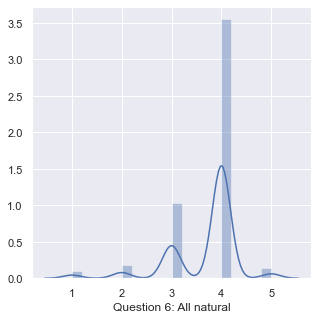

In [26]:
sns.distplot(df["Question 6: All natural"].dropna())

# 3. Examine the free text reasons for selecting a particular brand of Greek Yogurt (Q17-19). 
Provide any managerially relevant points. You do NOT need to extensively code this text data to answer this question. Just create a wordle or similar figure and get a sense of things. Hint: Copy and Paste the 3 variable columns from the data view to Word. Then highlight all of this text (use control-A) and change the font to All CAPS. Select a tool to create a wordle – this website has several suggestions https://monkeylearn.com/blog/wordle/ .  Copy all of the All CAPS text and paste it into the provided box and click go. You can play with the layout and colors using the menus at the top of the wordle. You could look for common mispellings of words to make sure the meaning is grouped in the counts, but this is not required. You may need to use a screenshot to capture your output depending on which tool you use. (1 slide)

In [27]:
df_q17 = df['17'].dropna()

In [28]:
# Create the list of words from Q 17
words = []
words2 = ""
for i in df_q17:
    words2 = words2 + i
    for word in i.split():
        words.append(word)  
        
len(words)

5757

In [29]:
df_q18 = df['18']
for i in df_q17:
    words2 = words2 + i
    for word in i.split():
        words.append(word)  
len(words)

11514

In [30]:
df_q18 = df['19']
for i in df_q17:
    words2 = words2 + i
    for word in i.split():
        words.append(word)  
len(words)

17271

In [31]:
words2

'Fat free with NO artificial sweetener added.AvailabilityPrior knowledgetasteHealth reasonsTastetaste I initially selected Fage because of it\'s prominent product placement (i.e., it was just the easiest one to try because it was so visible).  But now I suppose I buy it because I\'ve developed brand loyalty. Qualityhigh protein and lower fat and caloriesqualityThicknessfamiliarityTaste, texture, and flavor.\n\nbut I wish more greek yogurt came in large sizes for packaging and cost savingstastetastepricefamiliar with brand - I know I like itI buy what\'s one sale, or what flavors are available.availabilitytextureKnown entityprice      caloriesthe price that week THE TASTEWhat the store carries.sugar contentTaste.Teastetaste!i select it based on maybe what is on sale that week. or what flavors they havecosthealthPrice - the cheaper, the better.calories & proteinProtein levelPrice.Taste, priceTastetaste and consistency.taste and textureIt is closest to the real Greek Yogult (taste and tex

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
yogurt_mask = np.array(Image.open("yogurt.png"))
yogurt_mask2 = np.array(Image.open("yogurt2.png"))
yogurt_mask3 = np.array(Image.open("yogurt3.png"))
yogurt_mask4 = np.array(Image.open("yogurt4.png"))

In [34]:
def transform_format(val):
    if val.all() == 0 or val.all() == 1:
        return 255
    else:
        return val

In [35]:
transformed_yogurt_mask4 = np.ndarray((yogurt_mask4.shape[0],yogurt_mask4.shape[1]), np.int32)
for i in range(len(yogurt_mask4)):
    transformed_yogurt_mask4[i] = list(map(transform_format, yogurt_mask4[i]))

In [36]:
# wordcloud = WordCloud(background_color='white', mask = transformed_yogurt_mask, contour_width=1, contour_color = 'grey',width=2000, height=2000, max_words = 60, colormap = 'cool').generate(words2)
# plt.figure(figsize = [15,15], dpi = 2000)
# plt.axis('off')
# plt.imshow(wordcloud)
# plt.show()

In [37]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

# 4. Compare the brand attribute ratings for Fage (Q24) versus Oikos (Q30) given by those who purchased a brand in the past month. Do these brands differ from one another on perceptions of (1) All natural, (2) Price, and (3) Taste? Provide any managerially relevant conclusions. (1 slide)

In [38]:
df

Session ID  Email      Submit Time Purchased in Last Month  \
0      403642773    NaN   6/28/2010 5:43                      No   
1      403647532    NaN   6/28/2010 6:07                     Yes   
2      403690017    NaN   6/28/2010 8:41                     Yes   
3      403690095    NaN   6/28/2010 8:41                     Yes   
4      403690128    NaN   6/28/2010 8:40                     Yes   
5      403690244    NaN   6/28/2010 8:40                     Yes   
6      403690313    NaN   6/28/2010 8:37                     Yes   
7      403690358    NaN   6/28/2010 8:42                     Yes   
8      403690398    NaN   6/28/2010 8:48                     Yes   
9      403690408    NaN   6/28/2010 8:43                     Yes   
10     403690456    NaN   6/28/2010 8:46                     Yes   
11     403690460    NaN   6/28/2010 8:43                     Yes   
12     403690527    NaN   6/28/2010 8:39                     Yes   
13     403690558    NaN   6/28/2010 8:45                     Yes   
14     403690573    NaN   6/28/2010 8:40                     Yes   
15     403690596    NaN   6/28/2010 8:41                     Yes   
16     403690615    NaN   6/28/2010 8:41                     Yes   
17     403690661    NaN   6/28/2010 8:40                     Yes   
18     403690722    NaN   6/28/2010 8:40                     Yes   
19     403690733    NaN   6/28/2010 8:40                     Yes   
20     403690742    NaN   6/28/2010 8:47                     Yes   
21     403690746    NaN   6/28/2010 8:51                     Yes   
22     403690786    NaN   6/28/2010 8:44                     Yes   
23     403690806    NaN   6/28/2010 8:36                      No   
24     403690820    NaN   6/28/2010 8:41                     Yes   
25     403690833    NaN   6/28/2010 8:42                     Yes   
26     403690842    NaN  6/29/2010 11:12                     Yes   
27     403690875    NaN   6/28/2010 8:39                     Yes   
28     403690891    NaN   6/28/2010 8:42                     Yes   
29     403690893    NaN   6/28/2010 8:42                     Yes   
...          ...    ...              ...                     ...   
1043   404793339    NaN   7/2/2010 12:25                     Yes   
1044   404796974    NaN   7/2/2010 12:53                     Yes   
1045   404809198    NaN   7/2/2010 13:55                     Yes   
1046   404833935    NaN   7/2/2010 15:56                     Yes   
1047   404836267    NaN   7/2/2010 16:11                      No   
1048   404837695    NaN   7/2/2010 16:32                     Yes   
1049   404848496    NaN   7/2/2010 18:18                     Yes   
1050   404849633    NaN   7/2/2010 18:31                     Yes   
1051   404860426    NaN   7/2/2010 20:42                     Yes   
1052   404864674    NaN   7/2/2010 21:47                     Yes   
1053   404880204    NaN    7/3/2010 3:39                     Yes   
1054   404886119    NaN    7/3/2010 5:32                     Yes   
1055   404904232    NaN    7/3/2010 9:20                     Yes   
1056   404912476    NaN   7/3/2010 10:52                     Yes   
1057   404916741    NaN   7/3/2010 12:00                     Yes   
1058   404920194    NaN   7/3/2010 12:39                     Yes   
1059   404928062    NaN   7/3/2010 14:50                     Yes   
1060   404958928    NaN    7/4/2010 3:29                      No   
1061   404971847    NaN    7/4/2010 7:46                     Yes   
1062   404980073    NaN    7/4/2010 9:59                     Yes   
1063   404980165    NaN    7/4/2010 9:54                      No   
1064   404985028    NaN   7/4/2010 11:20                      No   
1065   405024811    NaN   7/4/2010 23:15                      No   
1066   405053983    NaN    7/5/2010 6:00                     Yes   
1067   405058091    NaN    7/5/2010 6:32                     Yes   
1068   405077575    NaN    7/5/2010 9:07                     Yes   
1069   405081405    NaN    7/5/2010 9:47                     Y

In [39]:
question_24 = [col for col in df.columns if col.startswith("Question 24: ")]
question_24.append('Purchased in Last Month')
question_30 = [col for col in df.columns if col.startswith("Question 30: ")]
question_30.append('Purchased in Last Month')

In [40]:
df_24 = df[question_24]
df_24 = df_24[df_24['Purchased in Last Month'] == 'Yes']
df_fage = df_24.iloc[:,1:-1]
df_fage.columns = [col.lstrip('Question 24: ') for col in df_fage.columns]
df_fage

All natural  Calorie level  Consistency  Fat level  Price  \
1             NaN            NaN          NaN        NaN    NaN   
2             NaN            NaN          NaN        NaN    NaN   
3             NaN            NaN          NaN        NaN    NaN   
4             NaN            NaN          NaN        NaN    NaN   
5             NaN            NaN          NaN        NaN    NaN   
6             4.0            5.0          4.0        5.0    3.0   
7             1.0            1.0          1.0        1.0    1.0   
8             NaN            NaN          NaN        NaN    NaN   
9             4.0            4.0          5.0        4.0    3.0   
10            5.0            4.0          4.0        4.0    3.0   
11            NaN            NaN          NaN        NaN    NaN   
12            5.0            3.0          5.0        3.0    3.0   
13            3.0            3.0          5.0        5.0    4.0   
14            5.0            5.0          5.0        5.0    5.0   
15            5.0            5.0          5.0        5.0    2.0   
16            5.0            5.0          5.0        5.0    3.0   
17            NaN            NaN          NaN        NaN    NaN   
18            5.0            5.0          5.0        5.0    4.0   
19            6.0            6.0          4.0        6.0    4.0   
20            5.0            5.0          5.0        5.0    3.0   
21            NaN            NaN          NaN        NaN    NaN   
22            4.0            5.0          5.0        5.0    2.0   
24            NaN            NaN          NaN        NaN    NaN   
25            5.0            5.0          5.0        5.0    3.0   
26            NaN            NaN          NaN        NaN    NaN   
27            NaN            NaN          NaN        NaN    NaN   
28            5.0            5.0          5.0        5.0    5.0   
29            5.0            5.0          5.0        5.0    5.0   
30            5.0            5.0          5.0        5.0    3.0   
31            5.0            5.0          5.0        5.0    3.0   
...           ...            ...          ...        ...    ...   
1038          NaN            NaN          NaN        NaN    NaN   
1039          NaN            NaN          NaN        NaN    NaN   
1040          NaN            NaN          NaN        NaN    NaN   
1041          NaN            NaN          NaN        NaN    NaN   
1042          NaN            NaN          NaN        NaN    NaN   
1043          NaN            NaN          NaN        NaN    NaN   
1044          NaN            NaN          NaN        NaN    NaN   
1045          5.0            5.0          5.0        5.0    4.0   
1046          NaN            NaN          NaN        NaN    NaN   
1048          NaN            NaN          NaN        NaN    NaN   
1049          5.0            5.0          5.0        5.0    2.0   
1050          5.0            5.0          5.0        5.0    3.0   
1051          4.0            5.0          5.0        5.0    3.0   
1052          3.0            5.0          5.0        5.0    3.0   
1053          4.0            4.0          5.0        3.0    2.0   
1054          NaN            NaN          NaN        NaN    NaN   
1055          6.0            5.0          5.0        5.0    4.0   
1056          5.0            5.0          5.0        5.0    5.0   
1057          NaN            NaN          NaN        NaN    NaN   
1058          5.0            4.0          5.0        4.0    4.0   
1059          NaN            NaN          NaN        NaN    NaN   
1061          4.0            4.0          4.0        4.0    3.0   
1062          4.0            4.0          4.0        6.0    6.0   
1066          NaN            NaN          NaN        NaN    NaN   
1067          NaN            NaN          NaN        NaN    NaN   
1068          NaN            NaN          NaN        NaN    NaN   
1069          NaN            NaN          NaN        NaN    NaN   
1070          5.0            5.0          5.0        

In [41]:
SHARED_ATTRIBUTES = ['All natural', 'Calorie level', 'Consistency', 'Fat level', 'Price',
       'Protein level', 'Taste', 'Texture']

In [42]:
df_30 = df[question_30]
df_30 = df_30[df_30['Purchased in Last Month'] == 'Yes']
df_oikos = df_30.iloc[:,1:-1]
df_oikos.columns = [col.lstrip('Question 30: ') for col in df_oikos.columns]

In [43]:
df_ttest2 = pd.DataFrame(columns = [col for col in SHARED_ATTRIBUTES],
                        index = ['Fage v Oikos t-test p-value'])
df_ttest2

All natural Calorie level Consistency Fat level  \
Fage v Oikos t-test p-value         NaN           NaN         NaN       NaN   

                            Price Protein level Taste Texture  
Fage v Oikos t-test p-value   NaN           NaN   NaN     NaN

In [44]:
for col in df_ttest2.columns:
    print(col)
    print(stats.ttest_rel(df_fage[col], df_oikos[col], nan_policy='omit'))
    df_ttest2.loc['Fage v Oikos t-test p-value', col] = stats.ttest_rel(df_fage[col], df_oikos[col], nan_policy='omit')[1]

All natural
Ttest_relResult(statistic=1.9219648337436972, pvalue=0.05601726817392757)
Calorie level
Ttest_relResult(statistic=0.6657472528149482, pvalue=0.5063359481582228)
Consistency
Ttest_relResult(statistic=8.809379343288608, pvalue=5.769017746407855e-16)
Fat level
Ttest_relResult(statistic=1.4066884859623305, pvalue=0.16106403069230957)
Price
Ttest_relResult(statistic=-4.55820086245522, pvalue=8.904793659909799e-06)
Protein level
Ttest_relResult(statistic=0.7948281876444463, pvalue=0.4276556423447654)
Taste
Ttest_relResult(statistic=6.740238081809708, pvalue=1.6035250076588567e-10)
Texture
Ttest_relResult(statistic=8.58151000014944, pvalue=2.484464418115773e-15)


In [45]:
df_ttest2

All natural Calorie level  Consistency Fat level  \
Fage v Oikos t-test p-value   0.0560173      0.506336  5.76902e-16  0.161064   

                                   Price Protein level        Taste  \
Fage v Oikos t-test p-value  8.90479e-06      0.427656  1.60353e-10   

                                 Texture  
Fage v Oikos t-test p-value  2.48446e-15

In [46]:
df_fage2 = pd.DataFrame(df_fage.stack(level = -0))
df_fage2['Brand'] = ['Fage'] * len(df_fage2)
df_fage2 = df_fage2.reset_index()
df_fage2.drop(columns = ['level_0'], inplace = True)
df_fage2.columns = ['Attribute', 'Score', 'Brand']
df_fage2

Attribute  Score Brand
0          All natural    4.0  Fage
1        Calorie level    5.0  Fage
2          Consistency    4.0  Fage
3            Fat level    5.0  Fage
4                Price    3.0  Fage
5        Protein level    5.0  Fage
6     Side by side cup    3.0  Fage
7                Taste    2.0  Fage
8              Texture    3.0  Fage
9          All natural    1.0  Fage
10       Calorie level    1.0  Fage
11         Consistency    1.0  Fage
12           Fat level    1.0  Fage
13               Price    1.0  Fage
14       Protein level    1.0  Fage
15    Side by side cup    6.0  Fage
16               Taste    1.0  Fage
17             Texture    1.0  Fage
18         All natural    4.0  Fage
19       Calorie level    4.0  Fage
20         Consistency    5.0  Fage
21           Fat level    4.0  Fage
22               Price    3.0  Fage
23       Protein level    4.0  Fage
24    Side by side cup    6.0  Fage
25               Taste    5.0  Fage
26             Texture    5.0  Fage
27         All natural    5.0  Fage
28       Calorie level    4.0  Fage
29         Consistency    4.0  Fage
...                ...    ...   ...
4914  Side by side cup    6.0  Fage
4915             Taste    5.0  Fage
4916           Texture    5.0  Fage
4917       All natural    4.0  Fage
4918     Calorie level    4.0  Fage
4919       Consistency    4.0  Fage
4920         Fat level    4.0  Fage
4921             Price    3.0  Fage
4922     Protein level    4.0  Fage
4923  Side by side cup    3.0  Fage
4924             Taste    5.0  Fage
4925           Texture    5.0  Fage
4926       All natural    4.0  Fage
4927     Calorie level    4.0  Fage
4928       Consistency    4.0  Fage
4929         Fat level    6.0  Fage
4930             Price    6.0  Fage
4931     Protein level    6.0  Fage
4932  Side by side cup    1.0  Fage
4933             Taste    5.0  Fage
4934           Texture    5.0  Fage
4935       All natural    5.0  Fage
4936     Calorie level    5.0  Fage
4937       Consistency    5.0  Fage
4938         Fat level    5.0  Fage
4939             Price    4.0  Fage
4940     Protein level    5.0  Fage
4941  Side by side cup    4.0  Fage
4942             Taste    5.0  Fage
4943           Texture    5.0  Fage

[4944 rows x 3 columns]

In [47]:
df_oikos2 = pd.DataFrame(df_oikos.stack())
df_oikos2['Brand'] = ['Oikos'] * len(df_oikos2)
df_oikos2 = df_oikos2.reset_index()
df_oikos2.drop(columns ='level_0', inplace = True)
df_oikos2.columns = ['Attribute', 'Score', 'Brand']
df_oikos2

Attribute  Score  Brand
0             All natural    5.0  Oikos
1           Calorie level    4.0  Oikos
2             Consistency    5.0  Oikos
3               Fat level    5.0  Oikos
4     Fruit on the bottom    5.0  Oikos
5                 Organic    5.0  Oikos
6                   Price    2.0  Oikos
7           Protein level    4.0  Oikos
8                   Taste    5.0  Oikos
9                 Texture    5.0  Oikos
10            All natural    5.0  Oikos
11          Calorie level    5.0  Oikos
12            Consistency    5.0  Oikos
13              Fat level    4.0  Oikos
14    Fruit on the bottom    4.0  Oikos
15                Organic    5.0  Oikos
16                  Price    3.0  Oikos
17          Protein level    5.0  Oikos
18                  Taste    5.0  Oikos
19                Texture    5.0  Oikos
20            All natural    5.0  Oikos
21          Calorie level    5.0  Oikos
22            Consistency    5.0  Oikos
23              Fat level    5.0  Oikos
24    Fruit on the bottom    6.0  Oikos
25                Organic    5.0  Oikos
26                  Price    4.0  Oikos
27          Protein level    5.0  Oikos
28                  Taste    5.0  Oikos
29                Texture    5.0  Oikos
...                   ...    ...    ...
5018          All natural    5.0  Oikos
5019        Calorie level    4.0  Oikos
5020          Consistency    4.0  Oikos
5021            Fat level    4.0  Oikos
5022  Fruit on the bottom    5.0  Oikos
5023              Organic    4.0  Oikos
5024                Price    3.0  Oikos
5025        Protein level    4.0  Oikos
5026                Taste    4.0  Oikos
5027              Texture    4.0  Oikos
5028          All natural    4.0  Oikos
5029        Calorie level    6.0  Oikos
5030          Consistency    5.0  Oikos
5031            Fat level    4.0  Oikos
5032  Fruit on the bottom    6.0  Oikos
5033              Organic    6.0  Oikos
5034                Price    3.0  Oikos
5035        Protein level    6.0  Oikos
5036                Taste    5.0  Oikos
5037              Texture    5.0  Oikos
5038          All natural    5.0  Oikos
5039        Calorie level    4.0  Oikos
5040          Consistency    5.0  Oikos
5041            Fat level    4.0  Oikos
5042  Fruit on the bottom    4.0  Oikos
5043              Organic    5.0  Oikos
5044                Price    2.0  Oikos
5045        Protein level    4.0  Oikos
5046                Taste    5.0  Oikos
5047              Texture    5.0  Oikos

[5048 rows x 3 columns]

In [48]:
df_4 = df_oikos2.append(df_fage2)
df_4

Attribute  Score  Brand
0             All natural    5.0  Oikos
1           Calorie level    4.0  Oikos
2             Consistency    5.0  Oikos
3               Fat level    5.0  Oikos
4     Fruit on the bottom    5.0  Oikos
5                 Organic    5.0  Oikos
6                   Price    2.0  Oikos
7           Protein level    4.0  Oikos
8                   Taste    5.0  Oikos
9                 Texture    5.0  Oikos
10            All natural    5.0  Oikos
11          Calorie level    5.0  Oikos
12            Consistency    5.0  Oikos
13              Fat level    4.0  Oikos
14    Fruit on the bottom    4.0  Oikos
15                Organic    5.0  Oikos
16                  Price    3.0  Oikos
17          Protein level    5.0  Oikos
18                  Taste    5.0  Oikos
19                Texture    5.0  Oikos
20            All natural    5.0  Oikos
21          Calorie level    5.0  Oikos
22            Consistency    5.0  Oikos
23              Fat level    5.0  Oikos
24    Fruit on the bottom    6.0  Oikos
25                Organic    5.0  Oikos
26                  Price    4.0  Oikos
27          Protein level    5.0  Oikos
28                  Taste    5.0  Oikos
29                Texture    5.0  Oikos
...                   ...    ...    ...
4914     Side by side cup    6.0   Fage
4915                Taste    5.0   Fage
4916              Texture    5.0   Fage
4917          All natural    4.0   Fage
4918        Calorie level    4.0   Fage
4919          Consistency    4.0   Fage
4920            Fat level    4.0   Fage
4921                Price    3.0   Fage
4922        Protein level    4.0   Fage
4923     Side by side cup    3.0   Fage
4924                Taste    5.0   Fage
4925              Texture    5.0   Fage
4926          All natural    4.0   Fage
4927        Calorie level    4.0   Fage
4928          Consistency    4.0   Fage
4929            Fat level    6.0   Fage
4930                Price    6.0   Fage
4931        Protein level    6.0   Fage
4932     Side by side cup    1.0   Fage
4933                Taste    5.0   Fage
4934              Texture    5.0   Fage
4935          All natural    5.0   Fage
4936        Calorie level    5.0   Fage
4937          Consistency    5.0   Fage
4938            Fat level    5.0   Fage
4939                Price    4.0   Fage
4940        Protein level    5.0   Fage
4941     Side by side cup    4.0   Fage
4942                Taste    5.0   Fage
4943              Texture    5.0   Fage

[9992 rows x 3 columns]

In [49]:
crosstab = pd.crosstab(index = df_4['Brand'], columns = df_4['Attribute'], values = df_4['Score'], aggfunc = 'mean')
crosstab.replace({np.nan: ""}, inplace = True)
crosstab

Attribute All natural Calorie level Consistency Fat level Fruit on the bottom  \
Brand                                                                           
Fage          4.73953       4.53721     4.80581   4.57273                       
Oikos         4.73715       4.49802      4.3913   4.57312             4.89718   

Attribute  Organic    Price Protein level Side by side cup    Taste  Texture  
Brand                                                                         
Fage                3.55254       4.67642          4.85185  4.78804  4.81703  
Oikos      4.79644     3.75       4.67723                   4.39053  4.35178

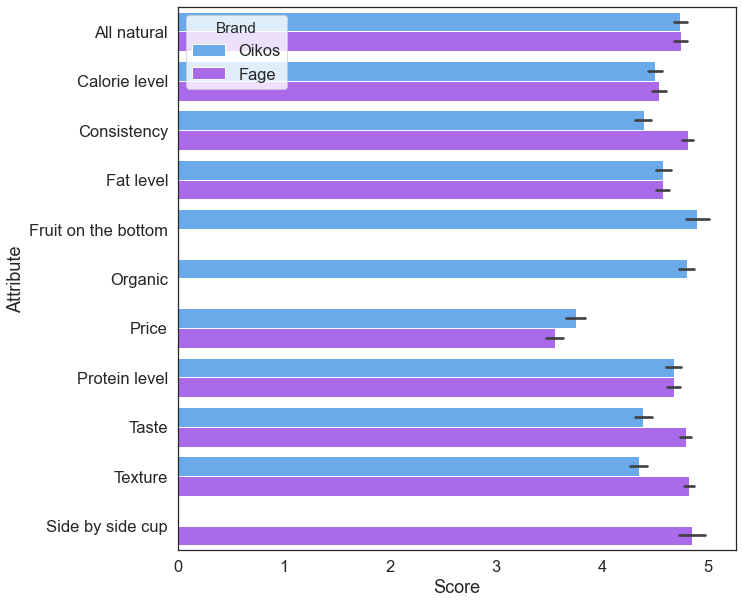

In [50]:
sns.set_style('white')
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5, style = 'white')
g = sns.barplot(data = df_4, y = 'Attribute', x = 'Score', palette = "cool", hue = "Brand")

In [51]:
question_5 = ['Question 6: All natural','Question 6: Organic',
              'Question 6: rbST free',
              'Question 6: Price',
              'Use For Cooking']

In [52]:
df[question_5].groupby('Use For Cooking').mean()


Question 6: All natural  Question 6: Organic  \
Use For Cooking                                                 
No                              3.638672             2.913725   
Yes                             3.745342             3.031579   

                 Question 6: rbST free  Question 6: Price  
Use For Cooking                                            
No                            3.504970           3.405138  
Yes                           3.514831           3.218295

In [53]:
df_5 = df[question_5]

In [54]:
cooking_yes = df_5[df_5['Use For Cooking'] == 'Yes']
cooking_no = df_5[df_5['Use For Cooking'] == 'No']
cooking_no.iloc[:,:-1]

Question 6: All natural  Question 6: Organic  Question 6: rbST free  \
2                         4.0                  3.0                    5.0   
3                         4.0                  4.0                    5.0   
5                         3.0                  5.0                    5.0   
6                         4.0                  3.0                    4.0   
9                         4.0                  4.0                    5.0   
10                        4.0                  3.0                    3.0   
11                        4.0                  4.0                    4.0   
13                        3.0                  2.0                    2.0   
14                        3.0                  3.0                    3.0   
15                        4.0                  4.0                    3.0   
17                        4.0                  4.0                    3.0   
20                        4.0                  3.0                    3.0   
25                        3.0                  3.0                    2.0   
27                        4.0                  4.0                    2.0   
28                        4.0                  1.0                    1.0   
30                        4.0                  4.0                    4.0   
34                        4.0                  2.0                    2.0   
36                        4.0                  2.0                    3.0   
42                        3.0                  4.0                    3.0   
44                        4.0                  3.0                    3.0   
45                        2.0                  1.0                    1.0   
48                        4.0                  3.0                    5.0   
49                        3.0                  1.0                    3.0   
51                        4.0                  1.0                    5.0   
52                        3.0                  3.0                    3.0   
54                        4.0                  4.0                    5.0   
59                        4.0                  4.0                    4.0   
60                        4.0                  4.0                    4.0   
62                        4.0                  NaN                    NaN   
70                        4.0                  2.0                    2.0   
...                       ...                  ...                    ...   
1012                      4.0                  2.0                    5.0   
1015                      4.0                  3.0                    1.0   
1016                      3.0                  2.0                    3.0   
1017                      4.0                  3.0                    4.0   
1020                      4.0                  4.0                    4.0   
1024                      4.0                  3.0                    4.0   
1025                      2.0                  2.0                    4.0   
1027                      4.0                  4.0                    4.0   
1028                      3.0                  2.0                    5.0   
1029                      4.0                  3.0                    4.0   
1030                      4.0                  4.0                    4.0   
1031                      4.0                  4.0                    3.0   
1033                      4.0                  2.0                    5.0   
1034                      4.0                  2.0                    5.0   
1036                      4.0                  4.0                    5.0   
1037                      3.0                  1.0                    5.0   
1040                      3.0                  5.0                    5.0   
1041                      1.0                  1.0                    1.0   
1043                      4.0                  4.0                    1.0   
1044                      2.0                  2.0                    1.0   
10

In [55]:
stats.ttest_ind(cooking_yes['Question 6: All natural'],cooking_no['Question 6: All natural'], nan_policy = 'omit')

Ttest_indResult(statistic=2.4766242350963057, pvalue=0.013428799384155239)

In [56]:
stats.ttest_ind(cooking_yes['Question 6: Organic'],cooking_no['Question 6: Organic'], nan_policy = 'omit')

Ttest_indResult(statistic=1.8263176106924126, pvalue=0.0681056227012469)

In [57]:
stats.ttest_ind(cooking_yes['Question 6: rbST free'],cooking_no['Question 6: rbST free'], nan_policy = 'omit')

Ttest_indResult(statistic=0.12774370731383597, pvalue=0.8983781958925485)

In [58]:
stats.ttest_ind(cooking_yes['Question 6: Price'],cooking_no['Question 6: Price'], nan_policy = 'omit')

Ttest_indResult(statistic=-3.4412812027263593, pvalue=0.0006032815403155255)

# Messing Around

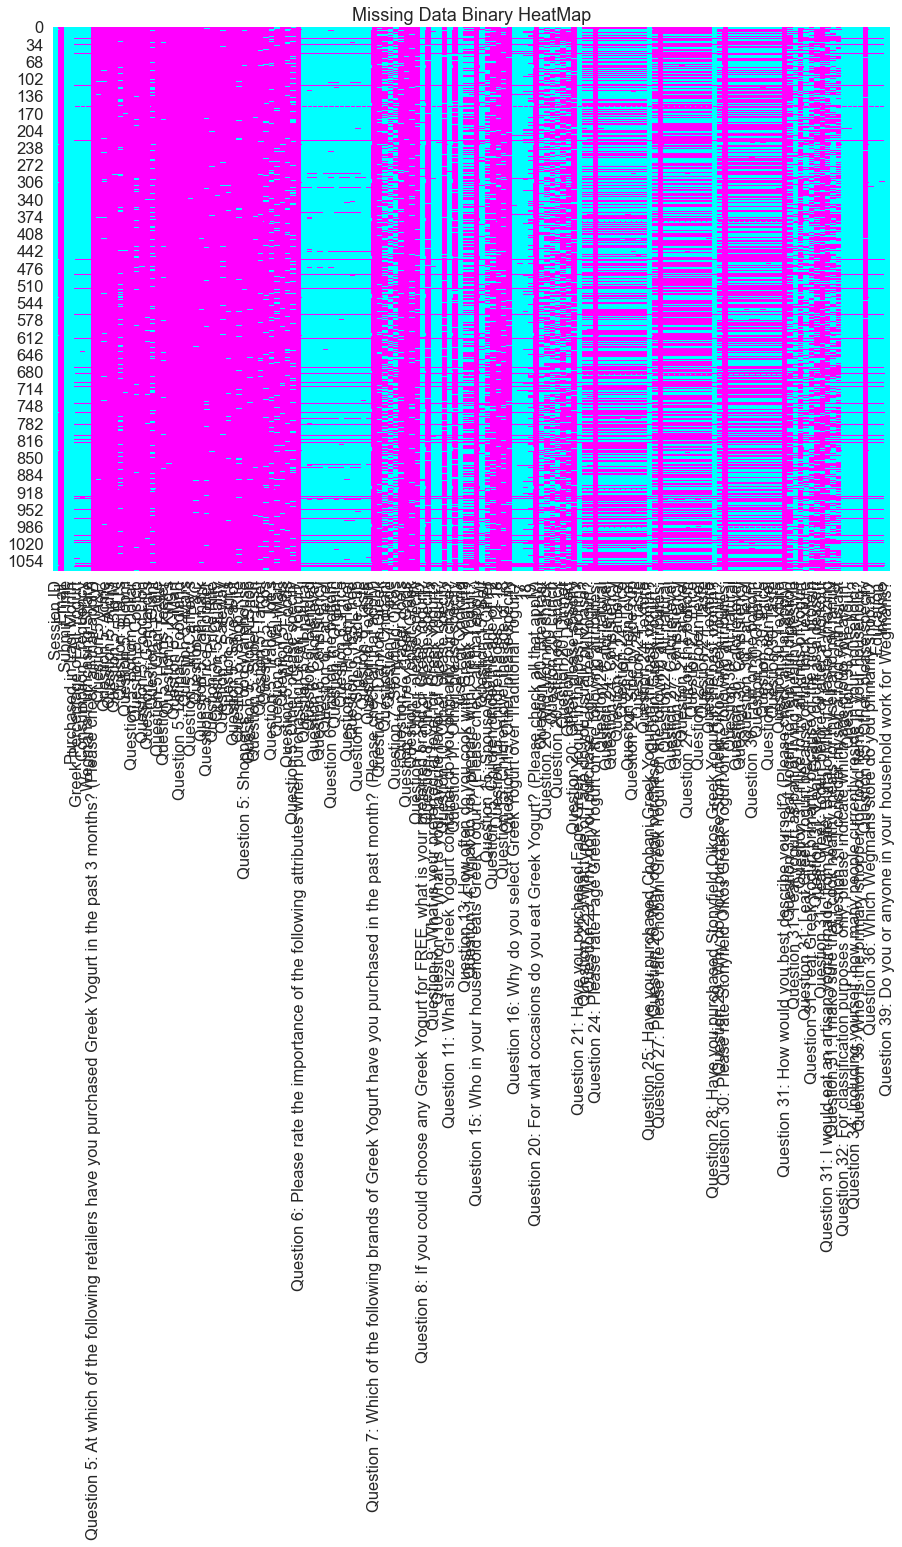

In [80]:
# Make a heatmap to show where the data is missing
plt.figure(figsize = (15,10))
missing_data = sns.heatmap(df.isnull(), cmap = "cool", cbar = False, xticklabels = True)
missing_data.set_title("Missing Data Binary HeatMap")
# plt.show()

In [62]:
df2 = df

In [63]:
# df2['Question 21: Have you purchased Fage Greek Yogurt in the past month?'].replace(to_replace = "Yes",
                                                                               #    value = 1, inplace = True)
# df2['Question 21: Have you purchased Fage Greek Yogurt in the past month?'].replace(to_replace = "No",
                                                                               #    value = 0, inplace = True)

In [64]:
# df2['Question 28: Have you purchased Stonyfield Oikos Greek Yogurt in the past month?'].replace(to_replace = "Yes",
                                                                                #   value = 1, inplace = True)
# df2['Question 28: Have you purchased Stonyfield Oikos Greek Yogurt in the past month?'].replace(to_replace = "No",
                                                                                 #  value = 0, inplace = True)

In [65]:
# df2['Use For Cooking'].replace(to_replace = "Yes",
                                                                               #    value = 1, inplace = True)
# df2['Use For Cooking'].replace(to_replace = "No",
                                                                                #   value = 0, inplace = True)

In [66]:
df

Session ID  Email      Submit Time Purchased in Last Month  \
0      403642773    NaN   6/28/2010 5:43                      No   
1      403647532    NaN   6/28/2010 6:07                     Yes   
2      403690017    NaN   6/28/2010 8:41                     Yes   
3      403690095    NaN   6/28/2010 8:41                     Yes   
4      403690128    NaN   6/28/2010 8:40                     Yes   
5      403690244    NaN   6/28/2010 8:40                     Yes   
6      403690313    NaN   6/28/2010 8:37                     Yes   
7      403690358    NaN   6/28/2010 8:42                     Yes   
8      403690398    NaN   6/28/2010 8:48                     Yes   
9      403690408    NaN   6/28/2010 8:43                     Yes   
10     403690456    NaN   6/28/2010 8:46                     Yes   
11     403690460    NaN   6/28/2010 8:43                     Yes   
12     403690527    NaN   6/28/2010 8:39                     Yes   
13     403690558    NaN   6/28/2010 8:45                     Yes   
14     403690573    NaN   6/28/2010 8:40                     Yes   
15     403690596    NaN   6/28/2010 8:41                     Yes   
16     403690615    NaN   6/28/2010 8:41                     Yes   
17     403690661    NaN   6/28/2010 8:40                     Yes   
18     403690722    NaN   6/28/2010 8:40                     Yes   
19     403690733    NaN   6/28/2010 8:40                     Yes   
20     403690742    NaN   6/28/2010 8:47                     Yes   
21     403690746    NaN   6/28/2010 8:51                     Yes   
22     403690786    NaN   6/28/2010 8:44                     Yes   
23     403690806    NaN   6/28/2010 8:36                      No   
24     403690820    NaN   6/28/2010 8:41                     Yes   
25     403690833    NaN   6/28/2010 8:42                     Yes   
26     403690842    NaN  6/29/2010 11:12                     Yes   
27     403690875    NaN   6/28/2010 8:39                     Yes   
28     403690891    NaN   6/28/2010 8:42                     Yes   
29     403690893    NaN   6/28/2010 8:42                     Yes   
...          ...    ...              ...                     ...   
1043   404793339    NaN   7/2/2010 12:25                     Yes   
1044   404796974    NaN   7/2/2010 12:53                     Yes   
1045   404809198    NaN   7/2/2010 13:55                     Yes   
1046   404833935    NaN   7/2/2010 15:56                     Yes   
1047   404836267    NaN   7/2/2010 16:11                      No   
1048   404837695    NaN   7/2/2010 16:32                     Yes   
1049   404848496    NaN   7/2/2010 18:18                     Yes   
1050   404849633    NaN   7/2/2010 18:31                     Yes   
1051   404860426    NaN   7/2/2010 20:42                     Yes   
1052   404864674    NaN   7/2/2010 21:47                     Yes   
1053   404880204    NaN    7/3/2010 3:39                     Yes   
1054   404886119    NaN    7/3/2010 5:32                     Yes   
1055   404904232    NaN    7/3/2010 9:20                     Yes   
1056   404912476    NaN   7/3/2010 10:52                     Yes   
1057   404916741    NaN   7/3/2010 12:00                     Yes   
1058   404920194    NaN   7/3/2010 12:39                     Yes   
1059   404928062    NaN   7/3/2010 14:50                     Yes   
1060   404958928    NaN    7/4/2010 3:29                      No   
1061   404971847    NaN    7/4/2010 7:46                     Yes   
1062   404980073    NaN    7/4/2010 9:59                     Yes   
1063   404980165    NaN    7/4/2010 9:54                      No   
1064   404985028    NaN   7/4/2010 11:20                      No   
1065   405024811    NaN   7/4/2010 23:15                      No   
1066   405053983    NaN    7/5/2010 6:00                     Yes   
1067   405058091    NaN    7/5/2010 6:32                     Yes   
1068   405077575    NaN    7/5/2010 9:07                     Yes   
1069   405081405    NaN    7/5/2010 9:47                     Y

In [72]:
xtab_cols = ['Greek Percentage of All Yogurt',
            'Consumption Frequency',
            'Wegmans Purhcasing Share',
            'Question 21: Have you purchased Fage Greek Yogurt in the past month?',
            'Question 28: Have you purchased Stonyfield Oikos Greek Yogurt in the past month?',
            'Use For Cooking',
            'Income']

In [73]:
df2[xtab_cols]

Greek Percentage of All Yogurt   Consumption Frequency  \
0                                   NaN                     NaN   
1                             50% - 75%             Once a week   
2                         Less than 25%   Less than once a week   
3        100% - I only buy Greek Yogurt  5 or more times a week   
4                             50% - 75%     3 to 4 times a week   
5     More than 75%, but less than 100%     3 to 4 times a week   
6                             25% - 49%             Once a week   
7                             25% - 49%            Twice a week   
8                             25% - 49%   Less than once a week   
9        100% - I only buy Greek Yogurt            Twice a week   
10       100% - I only buy Greek Yogurt            Twice a week   
11       100% - I only buy Greek Yogurt  5 or more times a week   
12       100% - I only buy Greek Yogurt     3 to 4 times a week   
13       100% - I only buy Greek Yogurt            Twice a week   
14                            25% - 49%   Less than once a week   
15       100% - I only buy Greek Yogurt     3 to 4 times a week   
16       100% - I only buy Greek Yogurt  5 or more times a week   
17    More than 75%, but less than 100%     3 to 4 times a week   
18       100% - I only buy Greek Yogurt   Less than once a week   
19                            50% - 75%            Twice a week   
20       100% - I only buy Greek Yogurt     3 to 4 times a week   
21                            50% - 75%            Twice a week   
22    More than 75%, but less than 100%     3 to 4 times a week   
23                                  NaN                     NaN   
24    More than 75%, but less than 100%     3 to 4 times a week   
25    More than 75%, but less than 100%            Twice a week   
26                        Less than 25%   Less than once a week   
27                            25% - 49%   Less than once a week   
28    More than 75%, but less than 100%  5 or more times a week   
29                            25% - 49%   Less than once a week   
...                                 ...                     ...   
1043     100% - I only buy Greek Yogurt  5 or more times a week   
1044     100% - I only buy Greek Yogurt     3 to 4 times a week   
1045     100% - I only buy Greek Yogurt     3 to 4 times a week   
1046                      Less than 25%   Less than once a week   
1047                                NaN                     NaN   
1048                      Less than 25%            Twice a week   
1049                          50% - 75%            Twice a week   
1050                                NaN     3 to 4 times a week   
1051  More than 75%, but less than 100%   Less than once a week   
1052     100% - I only buy Greek Yogurt  5 or more times a week   
1053     100% - I only buy Greek Yogurt     3 to 4 times a week   
1054  More than 75%, but less than 100%     3 to 4 times a week   
1055                          25% - 49%            Twice a week   
1056     100% - I only buy Greek Yogurt     3 to 4 times a week   
1057  More than 75%, but less than 100%  5 or more times a week   
1058                          50% - 75%            Twice a week   
1059                      Less than 25%   Less than once a week   
1060                                NaN                     NaN   
1061                          25% - 49%            Twice a week   
1062  More than 75%, but less than 100%   Less than once a week   
1063                                NaN                     NaN   
1064                                NaN                     NaN   
1065                                NaN                     NaN   
1066                      Less than 25%   Less than once a week   
1067                          50% - 75%            Twice a week   
1068                          25% - 49%  5 or more times a week   
1069                      Less than 25%   Less than once a week   
1070     100% - I only buy Greek Yogurt            Twice

In [74]:
pd.crosstab(index = df2['Question 21: Have you purchased Fage Greek Yogurt in the past month?'],
            columns = df2['Use For Cooking'])

Use For Cooking                                      No  Yes
Question 21: Have you purchased Fage Greek Yogu...          
No                                                  281  162
Yes                                                 234  325

In [75]:
pd.crosstab(index = df2['Question 28: Have you purchased Stonyfield Oikos Greek Yogurt in the past month?'],
            columns = df2['Use For Cooking'])

Use For Cooking                                      No  Yes
Question 28: Have you purchased Stonyfield Oiko...          
No                                                  244  246
Yes                                                 271  241

In [76]:
pd.crosstab(index = df2['Wegmans Purhcasing Share'],
            columns = df2['Use For Cooking'])

Use For Cooking                             No  Yes
Wegmans Purhcasing Share                           
100% - I only buy Greek Yogurt at Wegmans  183  176
25% - 49%                                   52   57
50% - 75%                                   69   62
Less than 25%                              112   83
More than 75%, but less than 100%           99  109

In [77]:
pd.crosstab(index = df2['Income'],
            columns = df2['Use For Cooking'])

Use For Cooking      No  Yes
Income                      
$100,000-$149,999    81   75
$150,000-$200,000    45   49
$25,000-$49,999      54   31
$50,000-$74,999      46   63
$75,000-$99,999      72   71
Less than $25,000    10   10
More than $200,000   30   38
Prefer not to say   175  149

In [79]:
pd.crosstab(index = df2['Consumption Frequency'],
            columns = df2['Use For Cooking']).reindex(['5 or more times a week',
                                                      '3 to 4 times a week',
                                                      'Twice a week',
                                                      'Once a week',
                                                      'Less than once a week'])

Use For Cooking          No  Yes
Consumption Frequency           
5 or more times a week  108  109
3 to 4 times a week     147  178
Twice a week            112   90
Once a week              60   53
Less than once a week    86   56

In [81]:
pd.crosstab(index = df2['Question 11: What size Greek Yogurt container do you primarily purchase?'],
            columns = df2['Use For Cooking'])

Use For Cooking                                      No  Yes
Question 11: What size Greek Yogurt container d...          
18 oz.                                               71  155
5.3 oz.                                             193  115
6 oz.                                               208  153
Other, please specify                                39   63

In [83]:
pd.crosstab(index = df2['Question 11: What size Greek Yogurt container do you primarily purchase?'],
            columns = df2['Consumption Frequency']).reorder(columns = ['5 or more times a week',
                                                                      '3 to 4 times a week',
                                                                      'Twice a week',
                                                                      'Once a week',
                                                                      'Less than once a week'],
                                                           index = ['18 oz.',
                                                                   '6 oz.',
                                                                   '5.3 oz.',
                                                                   'Other, please specify'])

AttributeError: 'DataFrame' object has no attribute 'reorder'